<a href="https://colab.research.google.com/github/kolla118/KOLLA_INFO5731_Spring2020-/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [2]:
# Write your code here

import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

words = set(nltk.corpus.words.words())

def get_lemmatized_docs(X):
  stemmer = WordNetLemmatizer()
  eng_stop_word_list = stopwords.words("english")
  bag_of_words = []
  for sen in range(0, len(X)):
      # removing all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))

      # removing all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

      # removing multiple spaces and adding single space in place
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # removing the 'b' prefix added during byte conversion
      document = re.sub(r'^b\s+', '', document)

      # removing numbers
      document = re.sub(r'\d+','',document)

      # converting all words to lowercase
      document = document.lower()
      
      # Splitting the cleaned document into a list of words, which will be subsequently added to a bag after more processing
      document = document.split()
      document = [stemmer.lemmatize(word) for word in document]
      document = [word for word in document if word not in eng_stop_word_list]
      document = ' '.join(document)

      document = " ".join(word for word in nltk.wordpunct_tokenize(document) if word.lower() in words or not word.isalpha())

      #Bag of words
      bag_of_words.append(document)

  return bag_of_words

df = pd.read_csv('iphone_reviews .csv')
#df.dropna(how='any', inplace=True)
clean_docs  = get_lemmatized_docs(df["Reviews"])
print(len(clean_docs))
print(clean_docs)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
58992
['star', 'fully unlocked', 'united state size provider grade purchase', 'nan', 'product fully unlocked inserted card work service provider checked number phone wa still locked original carrier phone came good condition use service provider', 'nan', 'nan', 'people found helpful', 'nan', 'helpful', 'nan', 'nan', 'report abuse', 'nan', 'showing comment', 'wa problem loading comment right please try later star', 'great purchase', 'united state august size provider grade purchase', 'nan', 'wa feeling bit skeptical order wa proven wrong phone look brand new besides minimal light scratch almost impossible notice battery life still also like wa scre

In [3]:
words = [word for word in clean_docs if str(word) != 'nan' and str(word) != '']
print(words)
word_list = []
for word in words:
  [word_list.append(val) for val in word.split(' ')]

word_str = ''
for word in word_list:
  word_str += word + ' '
print(word_str)

['star', 'fully unlocked', 'united state size provider grade purchase', 'product fully unlocked inserted card work service provider checked number phone wa still locked original carrier phone came good condition use service provider', 'people found helpful', 'helpful', 'report abuse', 'showing comment', 'wa problem loading comment right please try later star', 'great purchase', 'united state august size provider grade purchase', 'wa feeling bit skeptical order wa proven wrong phone look brand new besides minimal light scratch almost impossible notice battery life still also like wa screen protector phone', 'star', 'great purchase', 'united state august', 'wa feeling bit skeptical order wa proven wrong phone look brand new besides minimal light scratch almost impossible notice battery life still also like wa screen protector phone', 'image review', 'function', 'image popover controller execute function', 'true', 'image popover controller execute function', 'popover rgnxevny_gallerysecti

In [4]:
import nltk
nltk.download('punkt')
token_list = nltk.word_tokenize(word_str)
res_trigrams = nltk.trigrams(token_list)
freq_trigrams = nltk.FreqDist(res_trigrams)
freq_trigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


FreqDist({('star', 'fully', 'unlocked'): 5,
          ('fully', 'unlocked', 'united'): 5,
          ('unlocked', 'united', 'state'): 24,
          ('united', 'state', 'size'): 1629,
          ('state', 'size', 'provider'): 1629,
          ('size', 'provider', 'grade'): 2870,
          ('provider', 'grade', 'purchase'): 2805,
          ('grade', 'purchase', 'product'): 33,
          ('purchase', 'product', 'fully'): 2,
          ('product', 'fully', 'unlocked'): 2,
          ('fully', 'unlocked', 'inserted'): 2,
          ('unlocked', 'inserted', 'card'): 2,
          ('inserted', 'card', 'work'): 3,
          ('card', 'work', 'service'): 2,
          ('work', 'service', 'provider'): 2,
          ('service', 'provider', 'checked'): 2,
          ('provider', 'checked', 'number'): 2,
          ('checked', 'number', 'phone'): 2,
          ('number', 'phone', 'wa'): 2,
          ('phone', 'wa', 'still'): 6,
          ('wa', 'still', 'locked'): 3,
          ('still', 'locked', 'original'): 2

In [5]:
from nltk.util import ngrams
import collections
token_bigram = nltk.word_tokenize(word_str)
bigrams = ngrams(token_bigram,2)
bigram_dist = nltk.FreqDist(bigrams)
single_word_dist = nltk.FreqDist([word for word in word_str.split(' ')])

for w1,w2 in bigram_dist:
  count_w1_w2 = bigram_dist[(w1,w2)]
  count_w1 = single_word_dist[w1]
  if(count_w1 != 0):
    print(w1,w2,(count_w1_w2/count_w1))

Streaming output truncated to the last 5000 lines.
buy writing 0.002403846153846154
writing new 0.16666666666666666
popover rjhssfhvk_gallerysection_main 0.0012165450121654502
rjhssfhvk_gallerysection_main function 1.0
later fra 0.0004091653027823241
fra star 1.0
battery mode 0.0014903129657228018
mode well 0.1
fine like 0.006535947712418301
later handy 0.0004091653027823241
handy star 0.3333333333333333
turned never 0.058823529411764705
never worked 0.011363636363636364
later manes 0.0004091653027823241
manes star 1.0
exactly daughter 0.02
broken front 0.02564102564102564
barely work 0.037037037037037035
amazing one 0.016574585635359115
later moss 0.0004091653027823241
moss star 1.0
later junior 0.0008183306055646482
junior dickey 0.5
dickey star 1.0
scratch right 0.001953125
right across 0.00039984006397441024
purchase dissatisfied 0.0003270111183780249
dissatisfied helpful 0.25
estado con 0.07407407407407407
con protector 0.006896551724137931
de tapia 0.001394700139470014
state exce

In [7]:
from typing import AnyStr

from collections import Counter      
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents

import pandas as pd
df = pd.read_csv('iphone_reviews .csv')

nltk.download('averaged_perceptron_tagger')
lower_case = word_str.lower()
word_tokens = nltk.word_tokenize(lower_case)
parts_of_speech_tags = nltk.pos_tag(word_tokens)

df.dropna(how='any', inplace=True)
cnts = Counter( tag for word,  tag in parts_of_speech_tags)
max_cnt = cnts['NN']
df['word groups'] = pos_tag_sents(df['Reviews'].apply(word_tokenize).tolist())


word_grps = df['word groups']
first = []
scnd = []
for grp in word_grps:
  cnt = Counter( tag for word,  tag in grp)
  first.append(cnt['NN'])
for val in first:
  rel_prob = val/max_cnt
  scnd.append(rel_prob)
print(scnd)

df1 = pd.DataFrame(first,columns = ['noun_count'])
df2 = pd. DataFrame(scnd,columns = ['prob_noun'])
res = pd.concat([df1,df2], axis=1, sort=False)
res_frame = pd.concat([df,res], axis = 1, sort = False)
res_frame

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[0.0, 0.0, 8.483059330516957e-05, 0.000203593423932407, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 0.0, 8.483059330516957e-05, 0.00016966118661033915, 1.6966118661033917e-05, 0.0, 0.0, 0.0, 0.00016966118661033915, 1.6966118661033917e-05, 3.3932237322067834e-05, 5.089835598310175e-05, 1.6966118661033917e-05, 0.0, 0.0, 5.089835598310175e-05, 6.786447464413567e-05, 5.089835598310175e-05, 0.0, 0.0, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 1.6966118661033917e-05, 1.6966118661033917e-05, 1.6966118661033917e-05, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 0.0, 1.6966118661033917e-05, 3.3932237322067834e-05, 8.483059330516957e-05, 6.786447464413567e-05, 0.0, 0.0, 3.3932237322067834e-05, 0.0, 6.786447464413567e-05, 1.6966118661033917e-05, 3.39322373

,Reviews,word groups,noun_count,prob_noun
0,Katherine1.0 out of 5 stars,"[(Katherine1.0, NNP), (out, IN), (of, IN), (5,...",0.0,0.000000
1,Not FULLY Unlocked,"[(Not, RB), (FULLY, NNP), (Unlocked, VBD)]",0.0,0.000000
2,"Reviewed in the United States on February 13, ...","[(Reviewed, VBN), (in, IN), (the, DT), (United...",5.0,0.000085
3,NaN,NaN,12.0,0.000204
4,Purchased this product advertised as fully u...,"[(Purchased, VBN), (this, DT), (product, NN), ...",1.0,0.000017
...,...,...,...,...
58983,Buen producto en buenas condiciones,"[(Buen, NNP), (producto, NN), (en, FW), (buena...",NaN,NaN
58984,"Reviewed in Mexico on January 15, 2021Size: 12...","[(Reviewed, VBN), (in, IN), (Mexico, NNP), (on...",NaN,NaN
58986,Buen producto,"[(Buen, NNP), (producto, NN)]",NaN,NaN
58990,Report abuse,"[(Report, NNP), (abuse, NN)]",NaN,NaN


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = []
for x in df['Reviews']:
  text.append(x)
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(text)
attributes = vectorizer.get_feature_names()
index=[n for n in range(1, len(text)+1)]
vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')
tf_idf=pd.DataFrame(tf_idf_matrix.T.todense(), index=attributes, columns=index)
tf_idf


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,2,3,4,5,6,7,8,9,10,...,25480,25481,25482,25483,25484,25485,25486,25487,25488,25489
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03xl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0km,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
únicamente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
único,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
únicos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
útil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
query = "Take these reviews with a pinch of salt."
cleaned_query = get_lemmatized_docs([query])
print(cleaned_query[0])

review salt


In [10]:
#cosine similarity
from nltk import corpus
import pandas
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
text = []
for x in df['Reviews']:
  text.append(x)

text.append(cleaned_query[0])
vectorizer = TfidfVectorizer(input=text, min_df=0.1, stop_words='english')
matrix = vectorizer.fit_transform(text)

cs_dict = {}
for i in range(0, matrix.shape[0]):
  sim=cosine_similarity(matrix[80], matrix[i])
  cs_dict[str(i)] = sim[0][0]
  i+=1

sorted_keys = (sorted(cs_dict, key=cs_dict.get,reverse=True))
sorted_cosine_dict = {}
for key in sorted_keys:
  sorted_cosine_dict[key] = cs_dict[key];

Review = []
cos = []
for y in sorted_cosine_dict:
  text.append([int(y)])
  cos.append(sorted_cosine_dict[y])
dafrme1 = pd.DataFrame(Review)

dafrme1['Rank'] = [i for i in range(1, len(sorted_keys)+1)]
dafrme1['Cossim'] = cos
dafrme1.head(500)

,Rank,Cossim
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
495,496,0.0
496,497,0.0
497,498,0.0
498,499,0.0


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [13]:
pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 60.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [14]:
import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

docs = [word.split() for word in clean_docs if str(word) != 'nan' and str(word) != '']
model = models.Word2Vec(docs,vector_size=300)
words = list(model.wv.index_to_key)
print(words)

['comment', 'wa', 'helpful', 'star', 'purchase', 'phone', 'provider', 'size', 'report', 'abuse', 'grade', 'state', 'united', 'problem', 'right', 'try', 'please', 'later', 'showing', 'loading', 'image', 'function', 'review', 'great', 'new', 'found', 'la', 'popover', 'one', 'el', 'de', 'work', 'good', 'battery', 'came', 'translate', 'en', 'screen', 'data', 'controller', 'execute', 'like', 'scratch', 'person', 'love', 'con', 'people', 'buy', 'condition', '_sl_', 'na', 'brand', 'life', 'apple', 'un', 'may', 'lo', 'true', 'excelente', 'perfect', 'june', 'would', 'get', 'e', 'ha', 'time', 'product', 'al', 'medium', 'price', 'day', 'look', 'august', 'unlocked', 'got', 'bien', 'everything', 'se', 'happy', 'charger', 'even', 'issue', 'really', 'back', 'well', 'camera', 'protector', 'recommend', 'customer', 'seller', 'come', 'amazing', 'money', 'box', 'bought', 'march', 'could', 'worth', 'far', 'month', 'use', 'original', 'sin', 'fine', 'working', 'fast', 'also', 'quality', 'used', 'received', '

In [15]:
model.wv.save_word2vec_format('model.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('model.bin')
print(model)

Word2Vec(vocab=1053, vector_size=300, alpha=0.025)


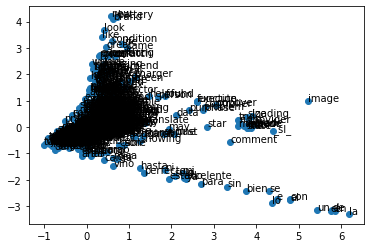

In [16]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 
https://raw.githubusercontent.com/kolla118/KOLLA_INFO5731_Spring2020-/main/iphone_reviews%20.csv


